<a href="https://colab.research.google.com/github/juccalle/CAP4630/blob/master/HW2/Assignment2PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST fashion data set

## Loading the MNIST fashion data set

In [2]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Exploring the format of the MNIST fashion data set

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_images)

60000

In [5]:
train_images.ndim

3

In [6]:
train_images.dtype

dtype('uint8')

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

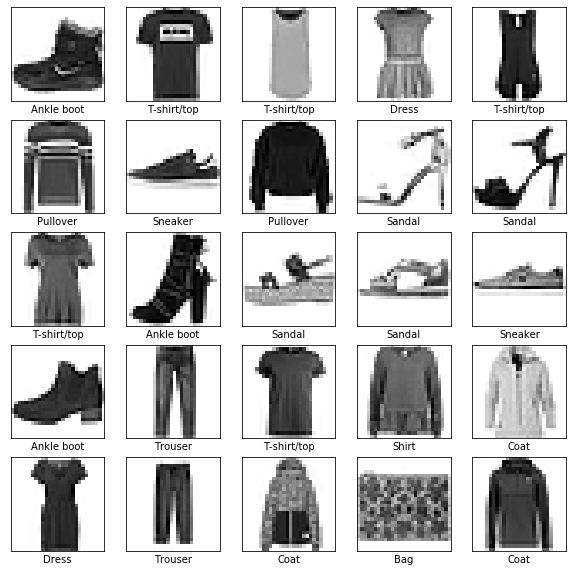

In [11]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

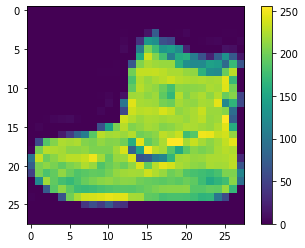

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the model

In [30]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 5
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 96us/sample - loss: 2.0637 - acc: 0.5961 - val_loss: 1.8554 - val_acc: 0.6757
Epoch 2/5
60000/60000 [==============================] - 5s 91us/sample - loss: 1.6905 - acc: 0.6859 - val_loss: 1.5498 - val_acc: 0.6800
Epoch 3/5
60000/60000 [==============================] - 5s 90us/sample - loss: 1.4333 - acc: 0.6965 - val_loss: 1.3378 - val_acc: 0.7000
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 1.2536 - acc: 0.7078 - val_loss: 1.1883 - val_acc: 0.7064
Epoch 5/5
60000/60000 [==============================] - 5s 91us/sample - loss: 1.1256 - acc: 0.7174 - val_loss: 1.0804 - val_acc: 0.7144


## Evaluate accuracy

In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 60us/sample - loss: 1.0804 - acc: 0.7144
Test accuracy: 0.7144


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

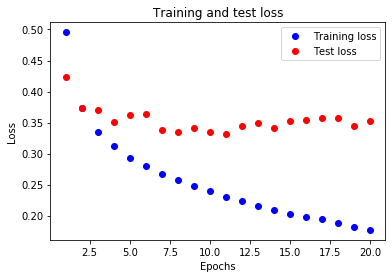

In [17]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

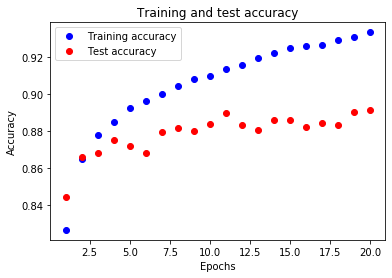

In [19]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make predictions

In [0]:
predictions = model.predict(test_images)

In [20]:
index = 0
predictions[index]

array([1.5001911e-08, 2.3269025e-16, 2.8826269e-10, 1.0700772e-11,
       1.3653272e-12, 4.7605077e-05, 1.6715870e-08, 5.7919938e-03,
       1.6224506e-10, 9.9416035e-01], dtype=float32)

In [21]:
np.argmax(predictions[index])

9

In [22]:
test_labels[index]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

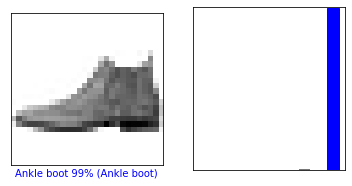

In [24]:
index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions,  test_labels)


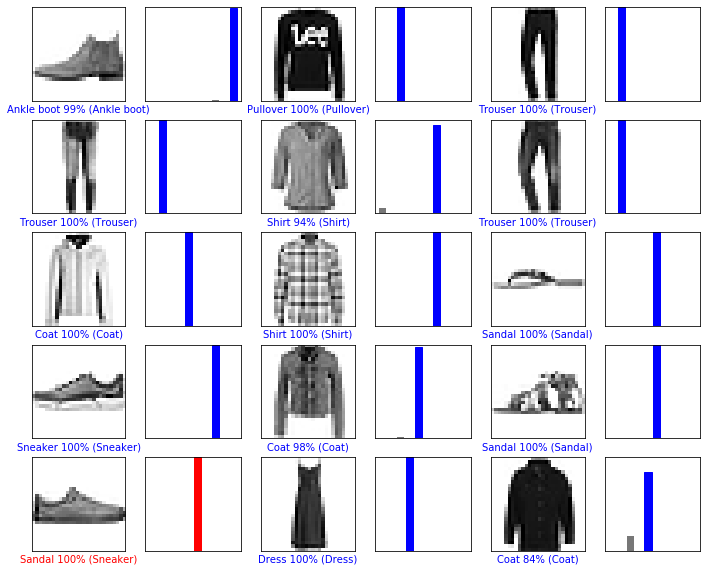

In [25]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


## Make prediction about a single image

In [26]:
index = 0
test_image = test_images[index]
print(test_image.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member
test_image_single = (np.expand_dims(test_image, 0))
print(test_image_single.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(test_image_single)
print(predictions_single)

[[1.5001882e-08 2.3269205e-16 2.8826269e-10 1.0700752e-11 1.3653325e-12
  4.7604986e-05 1.6715902e-08 5.7919770e-03 1.6224536e-10 9.9416035e-01]]


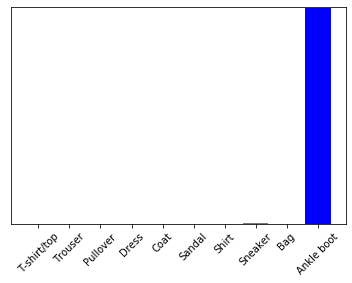

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

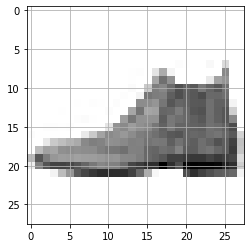

In [30]:
plt.imshow(test_image, cmap=plt.cm.binary)
plt.grid(None)

In [31]:
np.argmax(predictions_single[0])

9

In [32]:
test_labels[index]

9

Overfit


In [32]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(1000, activation=tf.nn.relu), 
    keras.layers.Dense(1000, activation=tf.nn.sigmoid), 
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [33]:

model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])

epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.7522 - acc: 0.7190 - val_loss: 0.6014 - val_acc: 0.7680
Epoch 2/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.4980 - acc: 0.8189 - val_loss: 0.4912 - val_acc: 0.8224
Epoch 3/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.4424 - acc: 0.8398 - val_loss: 0.4593 - val_acc: 0.8361
Epoch 4/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.4149 - acc: 0.8498 - val_loss: 0.4328 - val_acc: 0.8437
Epoch 5/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.3906 - acc: 0.8585 - val_loss: 0.4127 - val_acc: 0.8539
Epoch 6/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.3731 - acc: 0.8644 - val_loss: 0.3979 - val_acc: 0.8586
Epoch 7/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.3569 - acc: 0.8702 - va

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 81us/sample - loss: 0.3821 - acc: 0.8654
Test accuracy: 0.8654


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

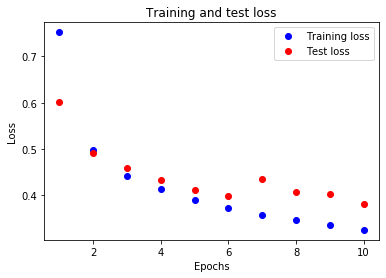

In [36]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

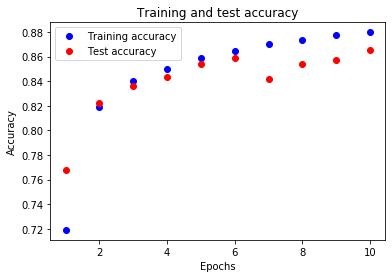

In [38]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Perfect Fit

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(40, activation=tf.nn.relu), 
    keras.layers.Dense(40, activation=tf.nn.softmax),
    keras.layers.Dense(40, activation=tf.nn.softmax),
    keras.layers.Dense(40, activation=tf.nn.softmax)
])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 40)                31400     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1640      
Total params: 36,320
Trainable params: 36,320
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])

epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/sample - loss: 2.2740 - acc: 0.3981 - val_loss: 1.4859 - val_acc: 0.4612
Epoch 2/20
60000/60000 [==============================] - 5s 82us/sample - loss: 1.3327 - acc: 0.4719 - val_loss: 1.2581 - val_acc: 0.4751
Epoch 3/20
60000/60000 [==============================] - 5s 79us/sample - loss: 1.2213 - acc: 0.4752 - val_loss: 1.2131 - val_acc: 0.4746
Epoch 4/20
60000/60000 [==============================] - 5s 79us/sample - loss: 1.1776 - acc: 0.5024 - val_loss: 1.1207 - val_acc: 0.5679
Epoch 5/20
60000/60000 [==============================] - 5s 80us/sample - loss: 1.0117 - acc: 0.5776 - val_loss: 0.9593 - val_acc: 0.5922
Epoch 6/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.8804 - acc: 0.6261 - val_loss: 0.7949 - val_acc: 0.6795
Epoch 7/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.6909 - acc: 0.7012 - val_loss: 0.

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.3879 - acc: 0.8712
Test accuracy: 0.8712


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

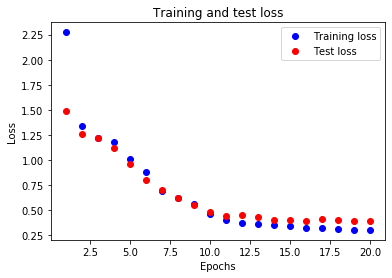

In [18]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

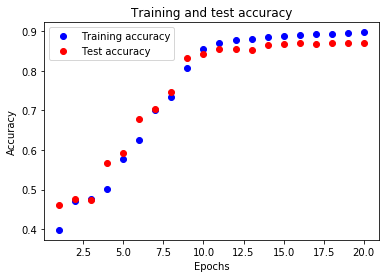

In [20]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()